<a href="https://colab.research.google.com/github/ISTE-VESIT-ORG/Machinera-2020/blob/Course-3/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Boston Housing Price Dataset
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000usd
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000s

In [143]:
data = pd.read_csv('Boston.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

# Simple Linear Regression


> Simple Linear Regression is of the form y = mx + c, where y is the dependent variable, x is the independent variable, m and c are the training parameters which are to be optimized during training process to get accurate predictions.


For more detail [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [144]:
X = data['rm']
y = data['medv']

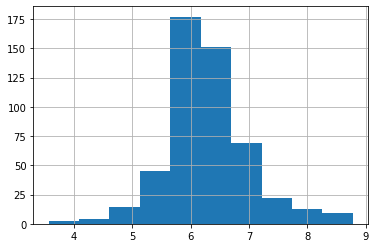

In [145]:
X.hist()

Text(0, 0.5, 'Price')

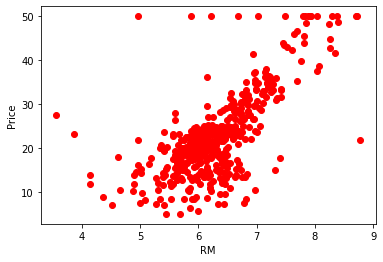

In [146]:
plt.scatter(X, y, color='red')
plt.xlabel('RM')
plt.ylabel('Price')

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [148]:
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
y_predicted = modelLR.predict(X_test)

In [152]:
from sklearn.metrics import mean_squared_error, r2_score

score = r2_score(y_test, y_predicted)
score

0.4569047606085107

Text(0, 0.5, 'Price')

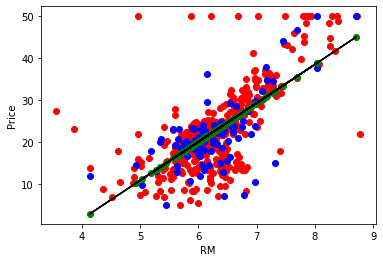

In [153]:
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_predicted, color='green')
plt.plot(X_test, y_predicted, color='black')
plt.xlabel('RM')
plt.ylabel('Price')

# Multiple Linear Regression

> Simple linear regression has only one x and one y variable. Multiple linear regression has one y and two or more x variables. For instance, when we predict rent based on square feet alone that is simple linear regression.

For more detail [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
X = data.iloc[:, :-1]
y = data['medv']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelMLR = LinearRegression()
modelMLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predicted = modelMLR.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

score = r2_score(y_test, y_predicted)
score

0.7438826183113517

# Polynomial Regression 

> In Linear Regression, when the data is plotted on the graph, there was a linear relationship between both the dependent and independent variables. Thus, it was more suitable to build a linear model to get accurate predictions. What if the data points had the following non-linearity making the linear model giving an error in predictions due to non-linearity?
<br>
<br>
In this case, we have to build a polynomial relationship which will accurately fit the data points in the given plot. This is called Polynomial Regression. The formula for a Polynomial Regression curve is given as y=w1x+w2x²+..+b



For more detail [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [56]:
X = data['rm']
y = data['medv']

In [57]:
X= np.array(X).reshape(-1, 1)
y= np.array(y).reshape(-1, 1)

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
modelPR = LinearRegression()
modelPR.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_predicted = modelPR.predict(X_poly)

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

score = r2_score(y, y_predicted)
score

0.5484256373971057

In [79]:
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)
X_grid_poly = poly_reg.fit_transform(X_grid)
y_predicted_grid = modelPR.predict(X_grid_poly)

Text(0, 0.5, 'Price')

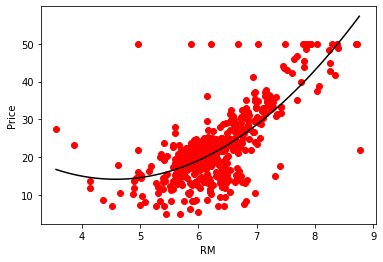

In [82]:
plt.scatter(X, y, color='red')
plt.plot(X_grid, y_predicted_grid, color='black')
plt.xlabel('RM')
plt.ylabel('Price')

# Decision Tree Regression

> It is a tree-structured classifier with three types of nodes. The Root Node is the initial node which represents the entire sample and may get split further into further nodes. The Interior Nodes represent the features of a data set and the branches represent the decision rules. Finally, the Leaf Nodes represent the outcome. This algorithm is very useful for solving decision-related problems.


For more detail [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [87]:
X = data.iloc[:, :-1]
y = data['medv']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [89]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
modelDTR = DecisionTreeRegressor(random_state=20)
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=20, splitter='best')

In [98]:
y_predicted = modelDTR.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

score = r2_score(y_test, y_predicted)
score

0.7070838590898079

# Random Forest Regression

> The Decision Tree is an easily understood and interpreted algorithm and hence a single tree may not be enough for the model to learn the features from it. On the other hand, Random Forest is also a “Tree”-based algorithm that uses the qualities features of multiple Decision Trees for making decisions.
Therefore, it can be referred to as a ‘Forest’ of trees and hence the name “Random Forest”. The term ‘Random’ is due to the fact that this algorithm is a forest of ‘Randomly created Decision Trees’.
The Decision Tree algorithm has a major disadvantage in that it causes over-fitting. This problem can be limited by implementing the Random Forest Regression in place of the Decision Tree Regression. Additionally, the Random Forest algorithm is also very fast and robust than other regression models.

For more detail [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [110]:
X = data.iloc[:, :-1]
y = data['medv']

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
modelRFR = RandomForestRegressor(n_estimators=200, random_state=20)
modelRFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

In [114]:
y_predicted = modelRFR.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

score = r2_score(y_test, y_predicted)
score

0.7882704891833094

# Support Vector Regression

> Support Vector Machine (SVM) is a very popular Machine Learning algorithm that is used in both Regression and Classification. Support Vector Regression is similar to Linear Regression in that the equation of the line is y= wx+b In SVR, this straight line is referred to as hyperplane. The data points on either side of the hyperplane that are closest to the hyperplane are called Support Vectors which is used to plot the boundary line.
Unlike other Regression models that try to minimize the error between the real and predicted value, the SVR tries to fit the best line within a threshold value (Distance between hyperplane and boundary line), a. Thus, we can say that SVR model tries satisfy the condition -a < y-wx+b < a. It used the points with this boundary to predict the value.


For more detail [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [126]:
X = data.iloc[:, :-1]
y = data['medv']

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [128]:
from sklearn.svm import SVR

In [129]:
modelSVR = SVR()
modelSVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [130]:
y_predicted = modelSVR.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

score = r2_score(y_test, y_predicted)
score

0.252374503048167